In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
WeatherData = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
CityNumber = 1
for city in cities:
    queryURL = url + "&q=" + city


    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(queryURL).json()

        # Parse out the max temp, humidity, and cloudiness
        latitude = city_weather["coord"]["lat"]
        longitude = city_weather["coord"]["lon"]
        MaxTemp = city_weather["main"]["temp_max"]
        Humidity = city_weather["main"]["humidity"]
        Clouds = city_weather["clouds"]["all"]
        WindSpeed = city_weather["wind"]["speed"]
        Country = city_weather["sys"]["country"]
        Date = city_weather["dt"]

        # Append the City information into city_data list
        WeatherData.append({"City": city, 
                          "Lat": latitude, 
                          "Long": longitude, 
                          "Max Temp": MaxTemp,
                          "Humidity": Humidity,
                          "Cloudiness": Clouds,
                          "Wind Speed": WindSpeed,
                          "Country": Country,
                          "Date": Date})
        CityNumber += 1

    except:
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Convert array of JSONs into Pandas DataFrame
df_WeatherData = pd.DataFrame(WeatherData)

latitude_list = df_WeatherData["Lat"]
longitude_list = df_WeatherData["Long"]
Temp_list = df_WeatherData["Max Temp"]
Humid_list = df_WeatherData["Humidity"]
Cloud_list = df_WeatherData["Cloudiness"]
Wind_list = df_WeatherData["Wind Speed"]

# Export the City_Data into a csv
df_WeatherData.to_csv(output_data_file, index_label="City_ID")

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Long          531
Max Temp      531
Wind Speed    531
dtype: int64

In [25]:
df_WeatherData.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,qaanaaq,1,GL,1557885901,75,77.48,-69.36,15.57,0.58
1,cape town,0,ZA,1557885769,93,-33.93,18.42,64.00,5.82
2,beringovskiy,91,RU,1557885901,94,63.05,179.32,31.53,10.07
3,jamestown,0,AU,1557885902,31,-33.21,138.60,67.14,5.23
4,zaysan,100,KZ,1557885668,83,47.47,84.87,35.98,14.67


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

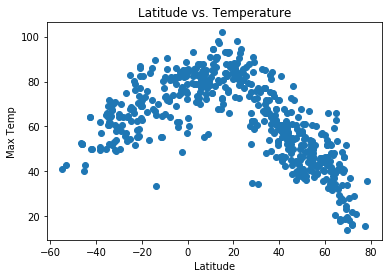

In [33]:
plt.scatter(latitude_list, Temp_list)

plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("output_data/LatVTemp.png")

#### Latitude vs. Humidity Plot

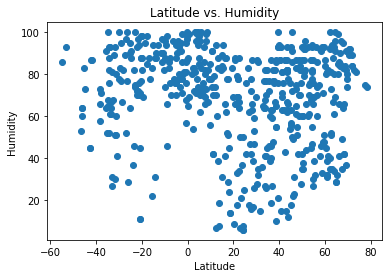

In [34]:
plt.scatter(latitude_list, Humid_list)
plt.title("Latitude vs. Humidity" )
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/LatVHumid.png")

#### Latitude vs. Cloudiness Plot

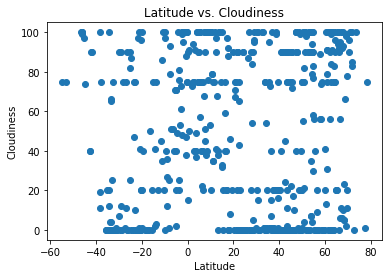

In [35]:
plt.scatter(latitude_list, Cloud_list)
plt.title("Latitude vs. Cloudiness" )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/LatVCloud.png")

#### Latitude vs. Wind Speed Plot

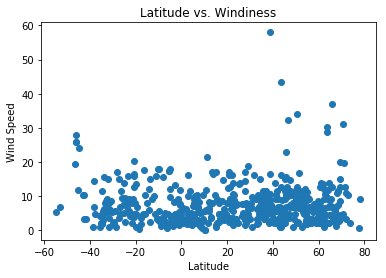

In [36]:
plt.scatter(latitude_list, Wind_list)
plt.title("Latitude vs. Windiness" )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/LatVWind.png")

## Analysis
Findings are as follows:
* Tempurature is highest at around 18 degrees latitude, and decreases the farther away from the this latitude
* There seems to be a slight correlation between lower latitudes and increased humidities.
* There does not seem to be much of a correlation between latitude and cloudiness
* There does not seem to be much of a correlation between latitude and windiness, but there are outliers at high and low latitudes.